# Parcours recherche: Aymane El Firdoussi: Performances of some sampling methods

-----
## Author

This notebook was created by **Aymane El Firdoussi** 

----


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# All imports go here

----
## Part 1 : Preliminaries

We start by defining the functions that we will need along this project, for instance the gradient of a function, some kernels, etc. the implementation of these functions can be found in the **utilities.py** file.

In [19]:
%run utilities.py
%run kernels.py
%run algorithms.py

----
###  Kernels

Along this project, we will be using these kernels:
- **Gaussian Kernel** given by:
$$ K(x, y) = \exp(- \frac{\| x - y \|^2}{2 \sigma^2}) $$

Its gradient is given by :

$$ \nabla_x K(x, y) = - \frac{K(x, y)}{\sigma^2} (x - y) $$

This kernel is associated to the Reproducing Kernel Hilbert Space (RKHS):
$$ H = adh( \{ \sum_{i = 1}^n \alpha_i k(x_i, .) , \alpha_1, ..., \alpha_n\}) $$
Which is the Hilbert space of functions that can be written as a finite combiantion of Gaussian kernels.

- The space of **band limited** functions in $ L^2(\mathbb{R})$ :
$$ H = \{ f \in \mathcal{C}(\mathbb{R}) | Supp(f) \subset [-a, a] \} $$
is a reproducting kernel hilbert space with **Reproducing Kernel**:

$$ K(x, y) = \frac{\sin(a(x - y))}{\pi (x - y)} $$

Its derivative is given by: (it is symmetric)

$$ \frac{\partial K}{\partial x} = \frac{a(x - y) \cos(a(x - y)) - \sin(a (x - y))}{\pi (x - y)^2 }  $$

Their implementation can be found in the file: **kernels.py**

----

### Test of the gradient function

In [3]:
# Test de la fonction gradient
def F(x):
    return gauss_kernel(x,0,1)

# Il faut trouver que gradient = gr_gauss_kernel à peu près
h = 1e-10
x = np.array([1, 2])
G = gradient(F, x, h)
gk = gr_gauss_kernel(x, 0, 1)
print(G)
print(gk)
print("Bonne approximation !")

[-0.08208503 -0.16417007]
[-0.082085 -0.16417 ]
Bonne approximation !


----
## Part 2: SVGD Implementing using the RBF Kernel

The parameters of the function SVGD are
- F : Potential function
- X : matrix of shape Nxd (N rows et d columns) such that each row contain a vector of our data
- h : gradient step (argument of the function **gradient**)
- lam : learning rate
- sigma: parameter in the RBF kernel / in the other algo, its **a**
- T : The total number of iterations


## $$ \mathcal{Complexity} $$

If we denote by $T$ the total number of iterations of the algorithm and by $N$ the total number of data points, then we can eaily conclude that the complexity of this version of SVGD is : $$ \mathcal{O}(N^2 T) $$

---


### Testing the algorithm in dimension d=1 with N = 200 and 200 iterations

- We will generate samples following a uniform law.
- Then we will perform SVGD on them to see if they will converge to a Gaussian Law


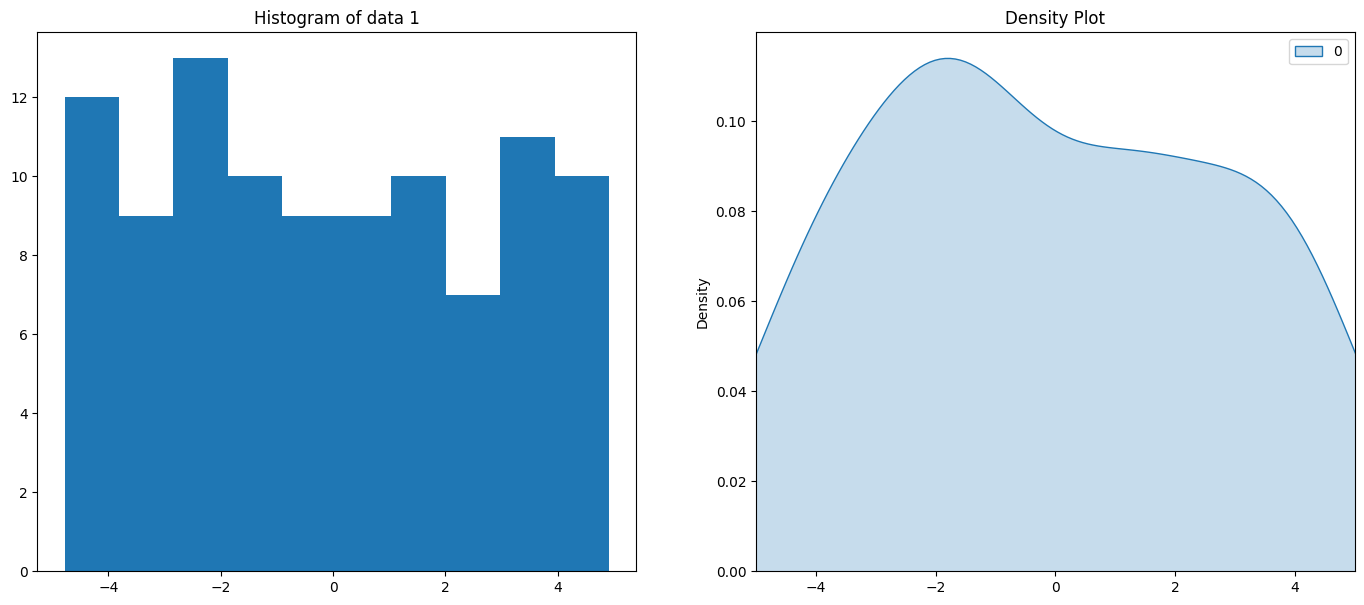

In [5]:
# Simulation of uniform density in [-5, 5]
X = gen_unif(100, 1, -5, 5)

# Plotting data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# Plot the histogram of data
axs[0].hist(X)
axs[0].set_title('Histogram of data 1')

# Plot the third scatter plot in the right subplot
sns.kdeplot(data=X, fill=True, ax=axs[1], bw_method='silverman')
axs[1].set_xlim((-5, 5))
axs[1].set_title('Density Plot')

# Show the plot
plt.show()

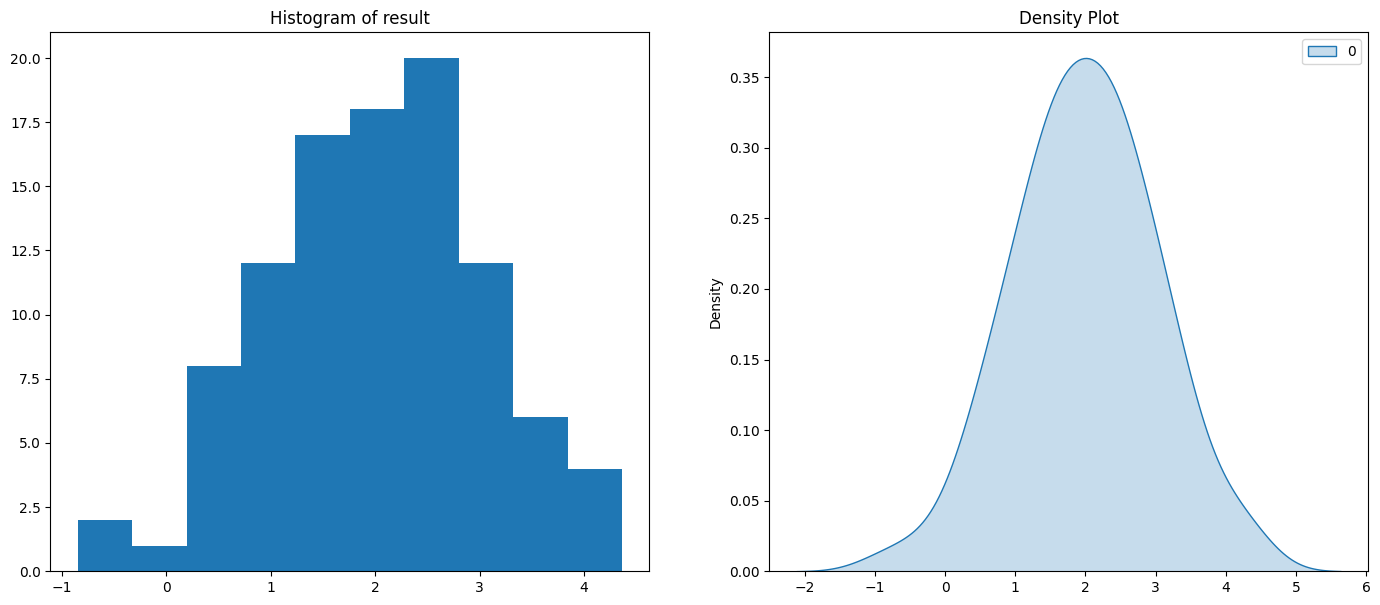

In [6]:
# Parameters of the SVGD
h = 1e-6
lam = 0.1
sigma = 1
T = 500

# Performing SVGD
xf = SVGD_gauss(potential_N21, X, h, lam, sigma, T) # expected time : 4m (for 200 iteration)


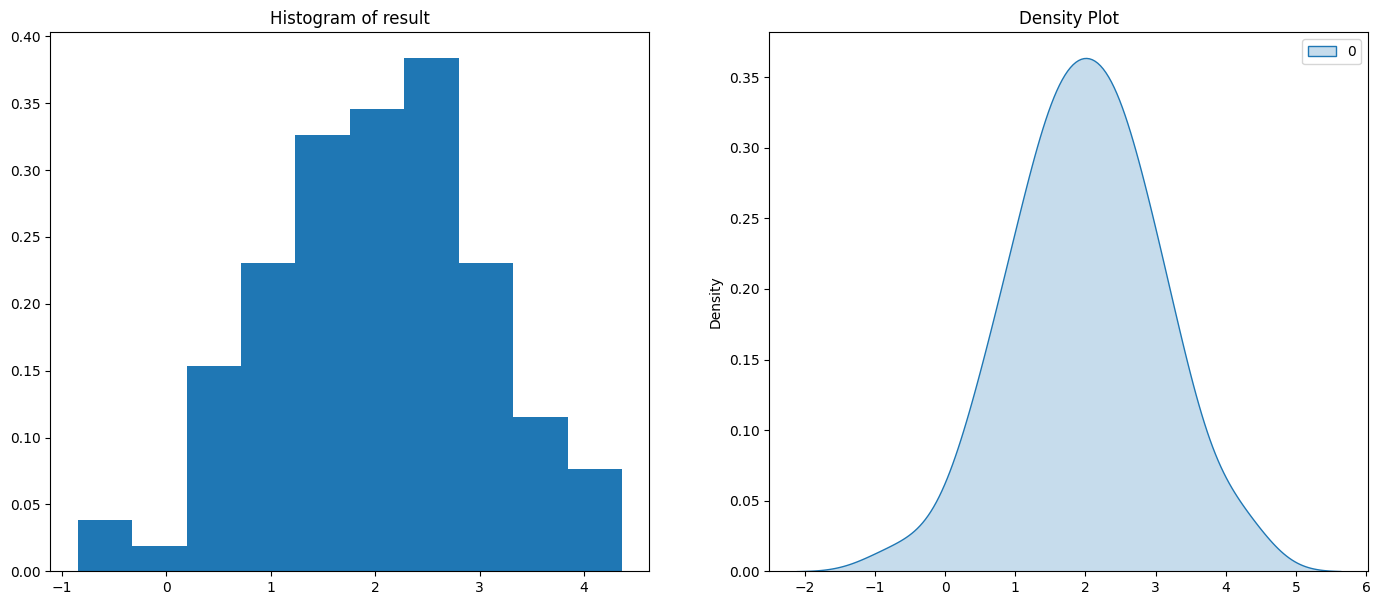

In [8]:
# Plotting the results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# Plot the histogram of data
axs[0].hist(xf, density = True)
axs[0].set_title('Histogram of result')

# Plot the third scatter plot in the right subplot
sns.kdeplot(data = xf, fill=True, ax=axs[1], bw_method='silverman')
axs[1].set_title('Density Plot')

# Show the plot
plt.show()

## $$ \mathcal{Comparison} $$


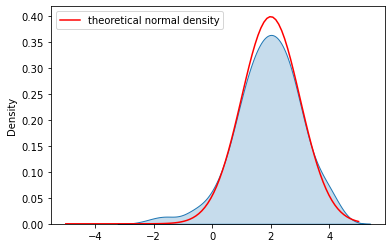

In [29]:
# Now the density of particles obtaned by applying SVGD to them
sns.kdeplot(data=xf, fill=True)
t = np.linspace(-5, 5, 100)
y = gauss_1d(t, 2, 1)
plt.plot(t, y, color="red", label="theoretical normal density")
plt.legend()
plt.show()

----
## $$\mathcal{Estimators} $$


In [7]:
# Values of estimation
print("The empirical mean is : ", empirical_mean(xf))
print("The empirical variance is : ", empirical_variance(xf))

The empirical mean is :  1.99016172922424
The empirical variance is :  1.0170982918472324


----
# Next approaches:
In the next sections, we will discuss
- The influence of the number of iterations
- The influence of the total number of samples
- The influence of the initial distribution : **theory** : if we use the Gaussian kernel, we should use a normal distribution as an initial distribution $\mu_0$, and if we use the uniform distribution as initial one, we can use the other kernel that we stated before.
- The influence of the learning rate


----
## The influence of the number of iterations
We will fix the number of samples to **100**


## !! Do not run !! (approx 10 min to converge)

In [38]:
# data
X = gen_unif(100, 1, -5, 5)

# Iterations
iters = [50, 100, 200, 500, 1000]
var_estim = []
mean_estim = []

# Performing estimations
h = 1e-6
lam = 0.1
sigma = 1

for n in iters:
    y = SVGD_gauss(potential_N21, X, h, lam, sigma, n)
    mean_estim.append(empirical_mean(y))
    var_estim.append(empirical_variance(y))


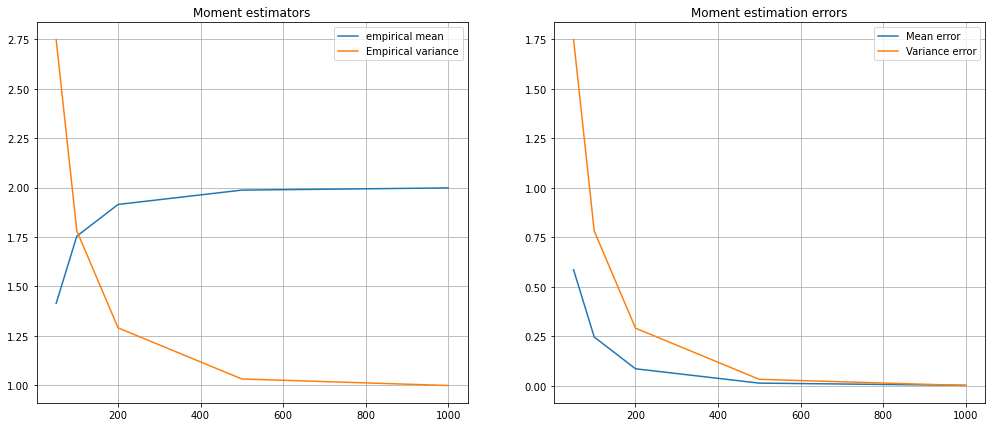

In [39]:
# Plotting results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# Plotting the results of the estimations
axs[0].plot(iters, mean_estim, label = "empirical mean")
axs[0].plot(iters, var_estim, label = "Empirical variance")
axs[0].set_title('Moment estimators')
axs[0].legend()
axs[0].grid()

# Plotting the error of estimation
mean_error = abs(2 - np.array(mean_estim))
var_error = abs(1 - np.array(var_estim))

axs[1].plot(iters, mean_error, label = "Mean error")
axs[1].plot(iters, var_error, label = "Variance error")
axs[1].set_title('Moment estimation errors')
axs[1].legend()
axs[1].grid()

# Show the plot
plt.show()


----
## The influence of the number of samples

The number of samples contributes in the moment estimators by the Law of Large Numbers. Hence we will observe its influence for a **fixed number of iterations of 100**.


In [40]:
# Samples
n_samples = [50, 100, 150, 200, 300]
var_estim = []
mean_estim = []

# Performing estimations
h = 1e-6
lam = 0.1
sigma = 1

for N in n_samples:
    X = gen_unif(N, 1, -5, 5)
    y = SVGD_gauss(potential_N21, X, h, lam, sigma, 100)
    mean_estim.append(empirical_mean(y))
    var_estim.append(empirical_variance(y))

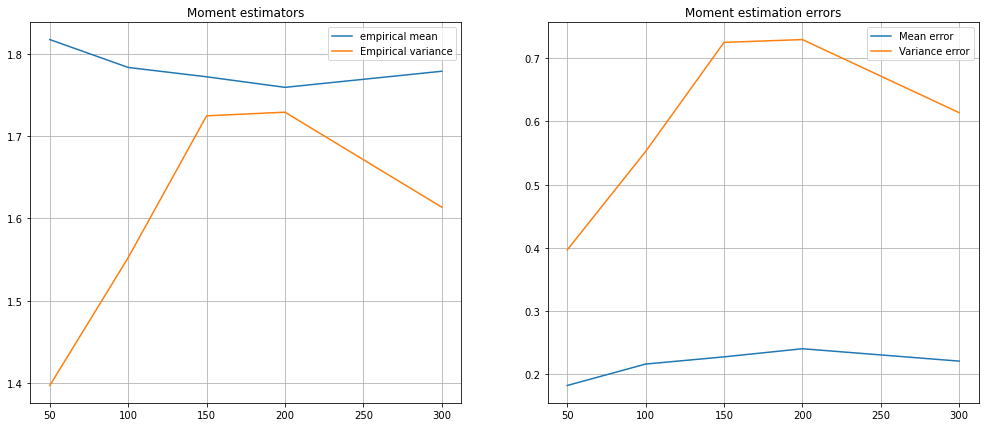

In [41]:
# Plotting results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# Plotting the results of the estimations
axs[0].plot(n_samples, mean_estim, label = "empirical mean")
axs[0].plot(n_samples, var_estim, label = "Empirical variance")
axs[0].set_title('Moment estimators')
axs[0].legend()
axs[0].grid()

# Plotting the error of estimation
mean_error = abs(2 - np.array(mean_estim))
var_error = abs(1 - np.array(var_estim))

axs[1].plot(n_samples, mean_error, label = "Mean error")
axs[1].plot(n_samples, var_error, label = "Variance error")
axs[1].set_title('Moment estimation errors')
axs[1].legend()
axs[1].grid()

# Show the plot
plt.show()


## $$\mathcal{Conclusion}$$
The error increases with the number $N$ of samples ! For a learning rate $\lambda = 0.1$, a good choice of $N$ and maxit coulb be : $$ N = 100 , T \geq 500 $$

----

## Influence of the learning rate:
Testing the influence of the Learning rate with fixed $\textbf{N = 50}$ and **maxit = 250**

In [10]:
# data
X = gen_unif(50, 1, -5, 5)

# Lambdas
lambdas = [0.01, 0.05, 0.1, 1, 1.5, 2]
var_estim = []
mean_estim = []

# Performing estimations
h = 1e-6
sigma = 1
maxit = 250

for lam in lambdas:
    y = SVGD_gauss(potential_N21, X, h, lam, sigma, maxit)
    mean_estim.append(empirical_mean(y))
    var_estim.append(empirical_variance(y))

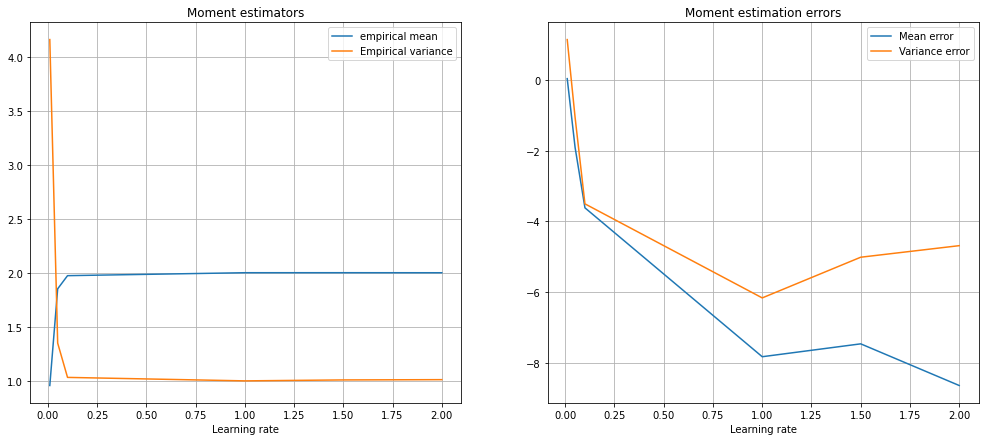

In [13]:
# Plotting results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# Plotting the results of the estimations
axs[0].plot(lambdas, mean_estim, label = "empirical mean")
axs[0].plot(lambdas, var_estim, label = "Empirical variance")
axs[0].set_title('Moment estimators')
axs[0].set_xlabel("Learning rate")
axs[0].legend()
axs[0].grid()

# Plotting the error of estimation
mean_error = abs(2 - np.array(mean_estim))
var_error = abs(1 - np.array(var_estim))

axs[1].plot(lambdas, np.log(mean_error), label = "Mean error")
axs[1].plot(lambdas, np.log(var_error), label = "Variance error")
axs[1].set_title('Moment estimation errors')
axs[1].set_xlabel("Learning rate")
axs[1].legend()
axs[1].grid()

# Show the plot
plt.show()


## $$ \mathcal{Conclusion} $$
The optimal learning rate is $ \lambda = 1 $  for **variance reduction**, and it gives very good estimation of the mean as well.

----

### Testing parameters that we judge to be optimal
Based on the previous results, we will adopt these parameters to see if they provide a good result or not: 
$$ N = 100, T = 500, \lambda = 1 $$

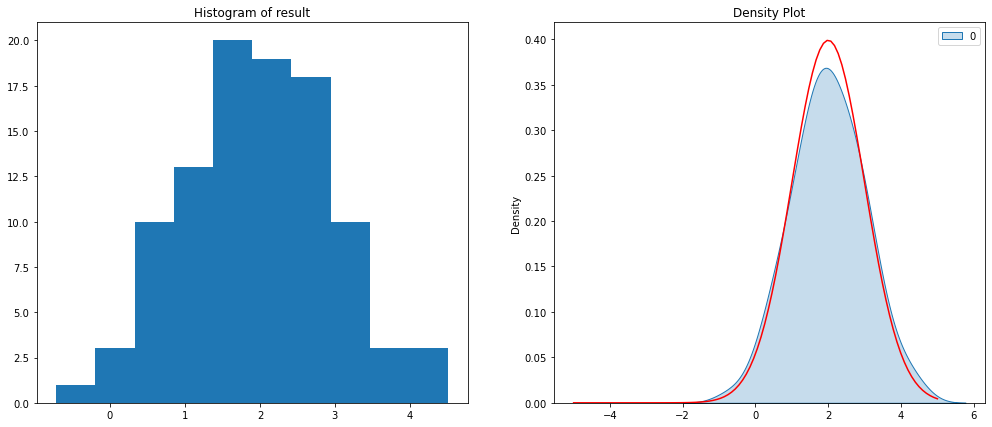

In [16]:
# Samples
X = gen_unif(100, 1, -5, 5)

# Parameters of the SVGD
h = 1e-6
lam = 1
sigma = 1
maxit = 500

# Performing SVGD
xf_optimal = SVGD_gauss(potential_N21, X, h, lam, sigma, maxit) 

# Plotting the results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# Plot the histogram of data
axs[0].hist(xf_optimal)
axs[0].set_title('Histogram of result')

# Plot density and the theoretical one
sns.kdeplot(data = xf_optimal, fill=True, ax=axs[1], bw_method='silverman')
t = np.linspace(-5, 5, 100)
y = gauss_1d(t, 2, 1)
axs[1].plot(t, y, color="red", label="theoretical normal density")
axs[1].set_title('Density Plot')

# Show the plot
plt.show()

In [17]:
# The result of estimations
print("The empirical mean is : ", empirical_mean(xf_optimal))
print("The empirical variance is : ", empirical_variance(xf_optimal))

The empirical mean is :  1.9984375341163025
The empirical variance is :  0.9992944914847299


----
## What if we performed SVGD with the other kernel ?

We will use the other version of the **SVGD** algorithm using the band limited kernel. We can take at first $a = 1$

In [51]:
# Samples
X = gen_unif(100, 1, -5, 5)

# Parameters of the SVGD
h = 1e-6
lam = 0.005
a = 1
maxit = 500

# Performing SVGD
xf_band = SVGD_band(potential_N21, X, h, lam, a, maxit) 


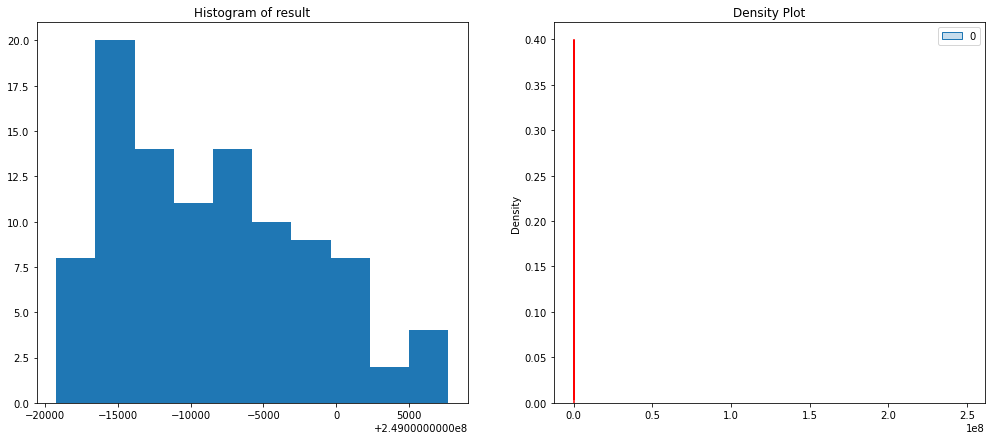

In [52]:
# Plotting the results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# Plot the histogram of data
axs[0].hist(xf_band)
axs[0].set_title('Histogram of result')

# Plot density and the theoretical one
sns.kdeplot(data = xf_band, fill=True, ax=axs[1], bw_method='silverman')
t = np.linspace(-5, 5, 100)
y = gauss_1d(t, 2, 1)
axs[1].plot(t, y, color="red", label="theoretical normal density")
axs[1].set_title('Density Plot')

# Show the plot
plt.show()

In [53]:
# The result of estimations
print("The empirical mean is : ", empirical_mean(xf_band))
print("The empirical variance is : ", empirical_variance(xf_band))

The empirical mean is :  248991540.16844624
The empirical variance is :  44132026.73504537


## $$ \mathcal{Conclusion} $$
The performances are bad with this kernel !

---

## Trying to perform SVGD with another initial distribution

We will use a normal distribution $\mathcal{N}(7, 0.1)$ to see what we get as result with the same parameters

In [13]:
# Generate initial samples
X_new = np.zeros(100)
for i in range(100):
    X_new[i] = np.random.normal(loc = 7, scale = np.sqrt(0.1))

# Now perform SVGD on this new data
h = 1e-6
sigma = 1
maxit = 500
lam = 1

xf = SVGD_gauss(potential_N21, X_new, h, lam, sigma, maxit)

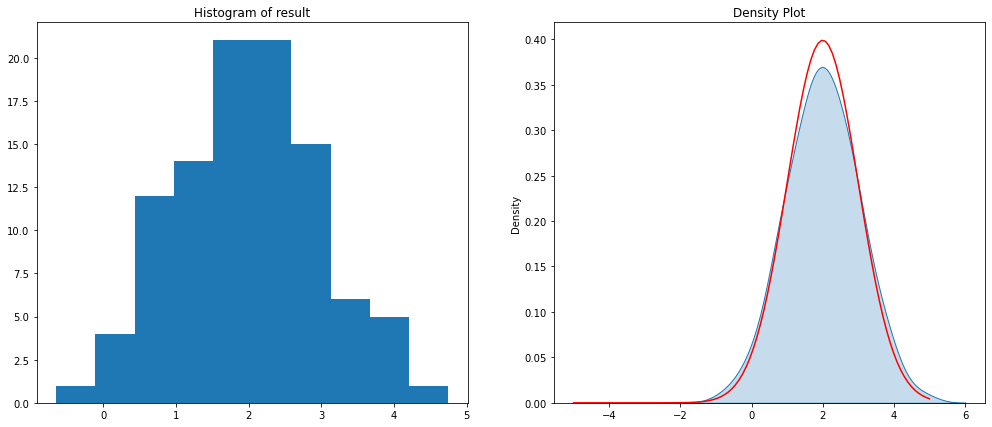

In [14]:
# Plotting the results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# Plot the histogram of data
axs[0].hist(xf)
axs[0].set_title('Histogram of result')

# Plot density and the theoretical one
sns.kdeplot(data = xf, fill=True, ax=axs[1], bw_method='silverman')
t = np.linspace(-5, 5, 100)
y = gauss_1d(t, 2, 1)
axs[1].plot(t, y, color="red", label="theoretical normal density")
axs[1].set_title('Density Plot')

# Show the plot
plt.show()

In [15]:
# The result of estimations
print("The empirical mean is : ", empirical_mean(xf))
print("The empirical variance is : ", empirical_variance(xf))

The empirical mean is :  2.000642733897149
The empirical variance is :  1.0040495640377285


## $$ \mathcal{Conclusion} $$
We get very good results as well.

----

## Dimension 2:

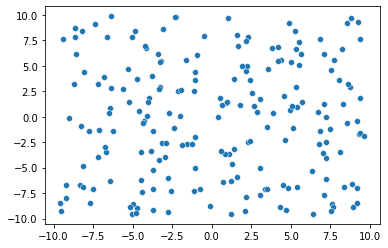

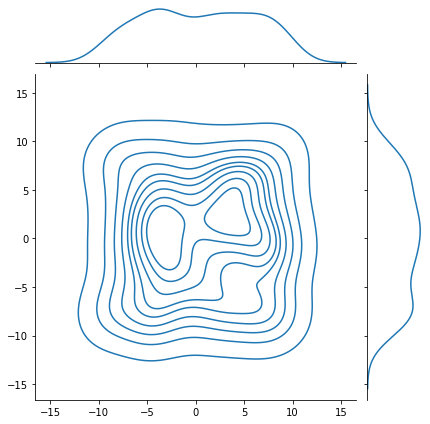

In [ ]:
X2 = genData(200,2) 
sns.scatterplot(x=X2.transpose()[0], y=X2.transpose()[1])
sns.jointplot(x = X2.transpose()[0], y=X2.transpose()[1], kind='kde') # for the uniform

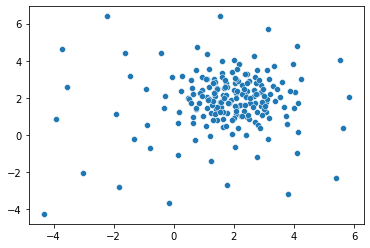

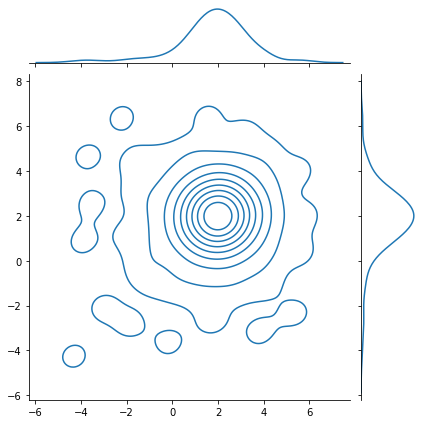

In [ ]:
# Now the particles obtained using SVGD
xf = SVGD(tar,X2,h,lam,sigma,100) # computation time: 2m47s avec 150 c'est 4m35
sns.scatterplot(x=xf.transpose()[0],y=xf.transpose()[1] )
sns.jointplot(x = xf.transpose()[0], y=xf.transpose()[1], kind='kde')


# Part 3: Langevin algorithm

It is defined by the Markov Chain:

$$ X_{n + 1} = X_n - h \nabla F(X_n) + \sqrt{2h} \xi_n $$

Where $\xi_n \sim \mathcal{N}(0, 1) $

Its parameters are the following:
- F : the function in the gradient
- N : the total number of samples desired
- d : the dimension of samples
- h : the gradient parameter ($\sim 10^{-6}$)
- ht : the gradient descent step: learning rate

## Testing of the algorithm on $\mathcal{N}(2, 1)$

<AxesSubplot:ylabel='Density'>

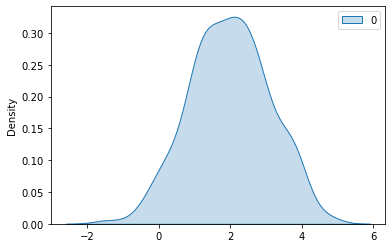

In [55]:
# Parameters of Langevin
ht = 0.1
h = 1e-6
N = 200

# Performing Langevin Monte Carlo
xf = LA(potential_N21, h, ht, N) # time : rapide: quelques secondes
sns.kdeplot(data = xf, fill=True)

In [56]:
# results of estimation
print("The empirical mean is : ", empirical_mean(xf))
print("The empirical variance is : ", empirical_variance(xf))

The empirical mean is :  1.9838770476253402
The empirical variance is :  1.225095301337698


-----
# Gaussian mixture

### What is a Gassian mixture:
If we denote by $f_{\mu, \sigma}$ the density if the Gaussian distribution $ \mathcal{N}(\mu, \sigma^2)$, then the density of a Gaussian mixture is Given by:
$$ p f_{\mu_1, \sigma_1} + (1 - p) f_{\mu_2, \sigma_2}  $$
And this function is the density if this random variable: 
\begin{equation}
X = 
\begin{cases}
Y & \text{if} & B = 1 \\
Z & \text{if} & B = 0
\end{cases}
\end{equation}
Where $$ B \sim Ber(p) $$
And $$ Y \sim \mathcal{N}(\mu_1, \sigma_1^2) , Z \sim \mathcal{N}(\mu_2, \sigma_2^2)$$

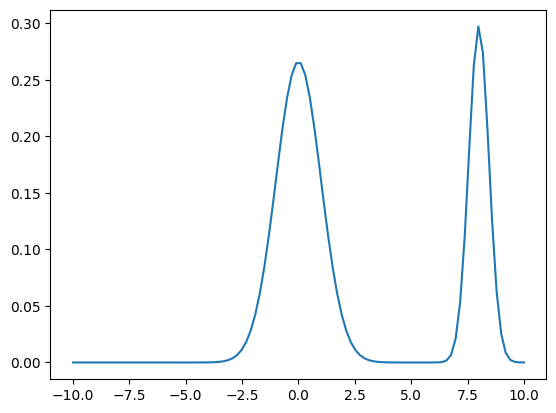

In [13]:
mean1 = 0
mean2 = 8
sigma1 = 1
sigma2 = np.sqrt(0.2)
x = np.linspace(-10,10,100)
y = mix_gauss(x ,mean1, mean2, sigma1, sigma2)
plt.plot(x,y)
plt.show()


# Part 4: Comparison between Langevin and SVGD to generate Gaussian mixture

We will try to generate the Gaussian mixture with parameters:
$$ p = \frac{2}{3}, \mu_1 = 0, \sigma_1 = 1, \mu_2 = 7, \sigma_2 = \sqrt{0,2}$$

## Generating samples from Gaussian mixture:

In [29]:
%run utilities.py
%run kernels.py
%run algorithms.py

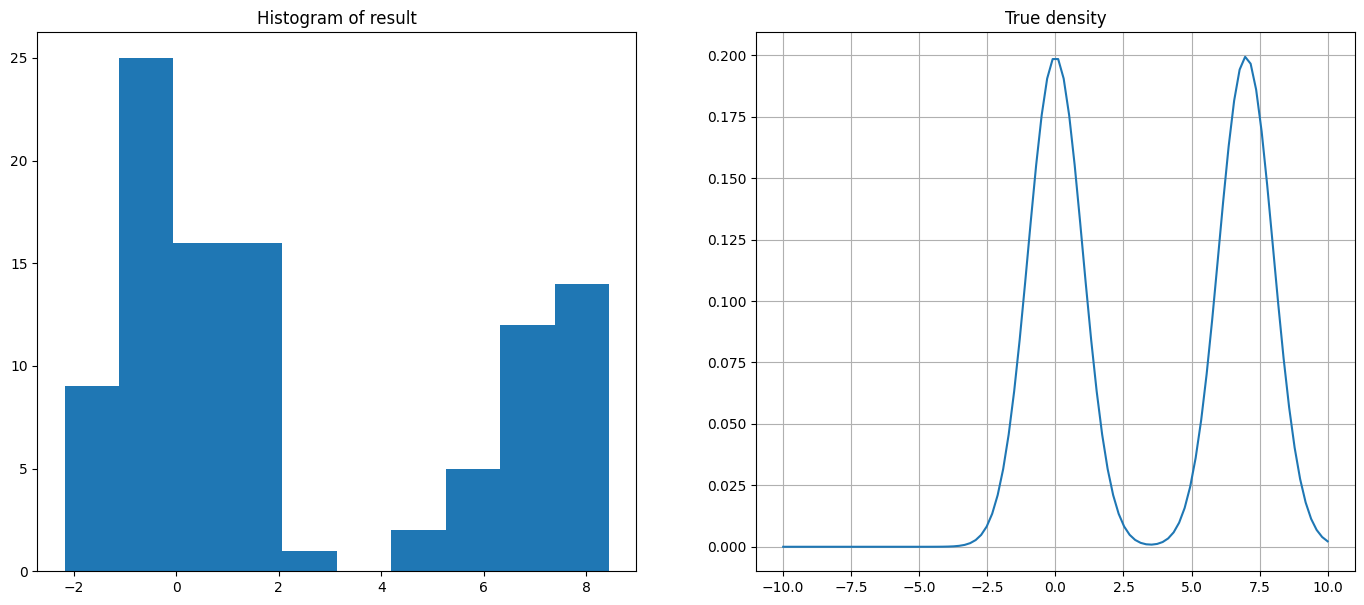

In [30]:
# Generate samples and see their empirical distibution and histogram
mean1 = 0
mean2 = 7
sigma1 = 1
sigma2 = 1
p = 2 / 3
X = gen_gauss_mix(100, mean1, sigma1, mean2, sigma2, p)

# Plotting results
fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(17, 7))

# Plot the histogram of data
axs[0].hist(X)
axs[0].set_title('Histogram of result')

# The true density
x = np.linspace(-10,10,100)
y = mix_gauss(x ,mean1, mean2, sigma1, sigma2)
axs[1].plot(x,y)
axs[1].set_title('True density')
axs[1].grid()

# Show the plot
plt.show()

In [15]:
# Result of estimators:
mask1 = (X < 5)
x1 = X[mask1]
mask2 = (X > 5)
x2 = X[mask2]
print("The estimation of mean 1 is : ", empirical_mean(x1))
print("The estimation of variance 1 is : ", empirical_variance(x1))
print("The estimation of mean 1 is : ", empirical_mean(x2))
print("The estimation of variance 1 is : ", empirical_variance(x2))

The estimation of mean 1 is :  0.07574548156070522
The estimation of variance 1 is :  0.6856786025318768
The estimation of mean 1 is :  7.012019991049821
The estimation of variance 1 is :  0.21825390065991498


## Testing Langevin on this Gaussian mixture

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


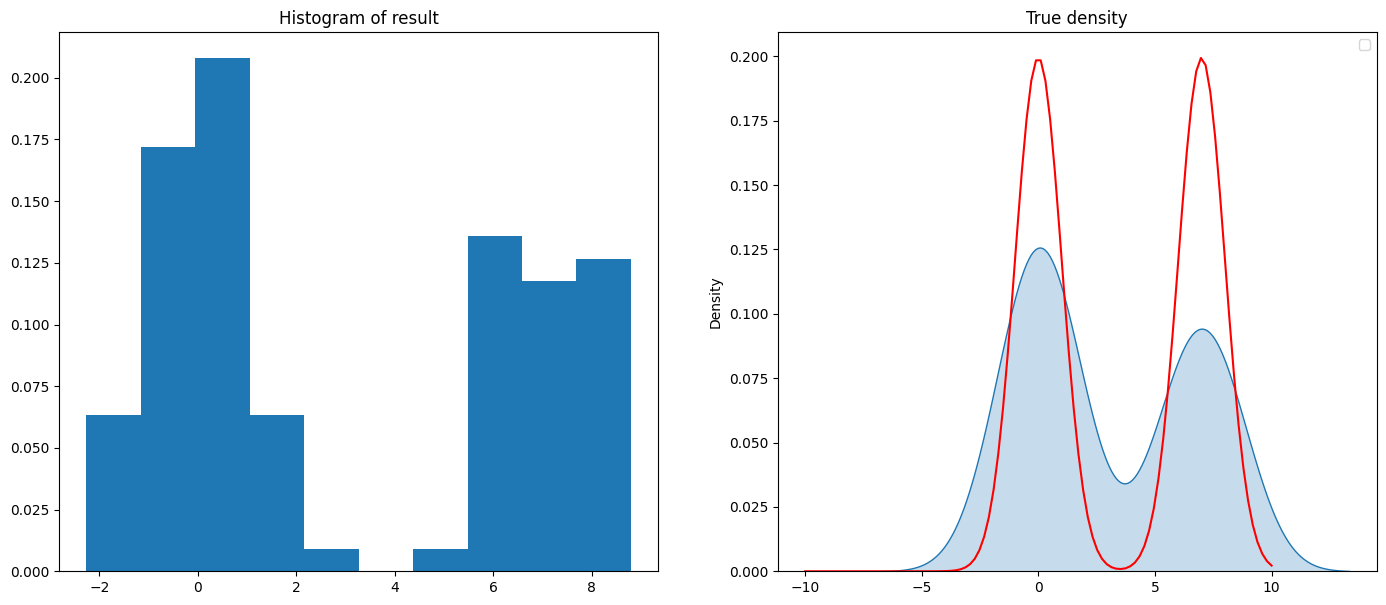

In [31]:
# Parameters of Lagevin
ht = 0.1
h = 1e-6
N = 100
d = 1
T = 5000

# Performing Langevin Monte Carlo
xf_LA = LA(tar_mix, N, d, h, ht, T)

# Plotting the results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# Plot the histogram of data
axs[0].hist(xf_LA, density = True)
axs[0].set_title('Histogram of result')

# Plot the theoretical density
sns.kdeplot(data = xf_LA, fill=True, ax=axs[1], bw_method='silverman')
x = np.linspace(-10,10,100)
y = mix_gauss(x ,mean1, mean2, sigma1, sigma2)
axs[1].plot(x,y, c = 'r')
axs[1].set_title('True density')
axs[1].legend()

# Show the plot
plt.show()

In [70]:
# Result of estimators:
mask1 = (xf_LA < 5)
x1 = xf_LA[mask1]
mask2 = (xf_LA > 5)
x2 = xf_LA[mask2]
print("The estimation of mean 1 is : ", empirical_mean(x1))
print("The estimation of variance 1 is : ", empirical_variance(x1))
print("The estimation of mean 1 is : ", empirical_mean(x2))
print("The estimation of variance 1 is : ", empirical_variance(x2))

The estimation of mean 1 is :  0.037023583614195416
The estimation of variance 1 is :  1.0830349252182092
The estimation of mean 1 is :  7.502391517768275
The estimation of variance 1 is :  0.4246563495433272


## $$ \mathcal{Conclusion}$$
Poor (very poor) estimation of the second gaussian

---

## Testing SVGD on the same Gaussian mixture

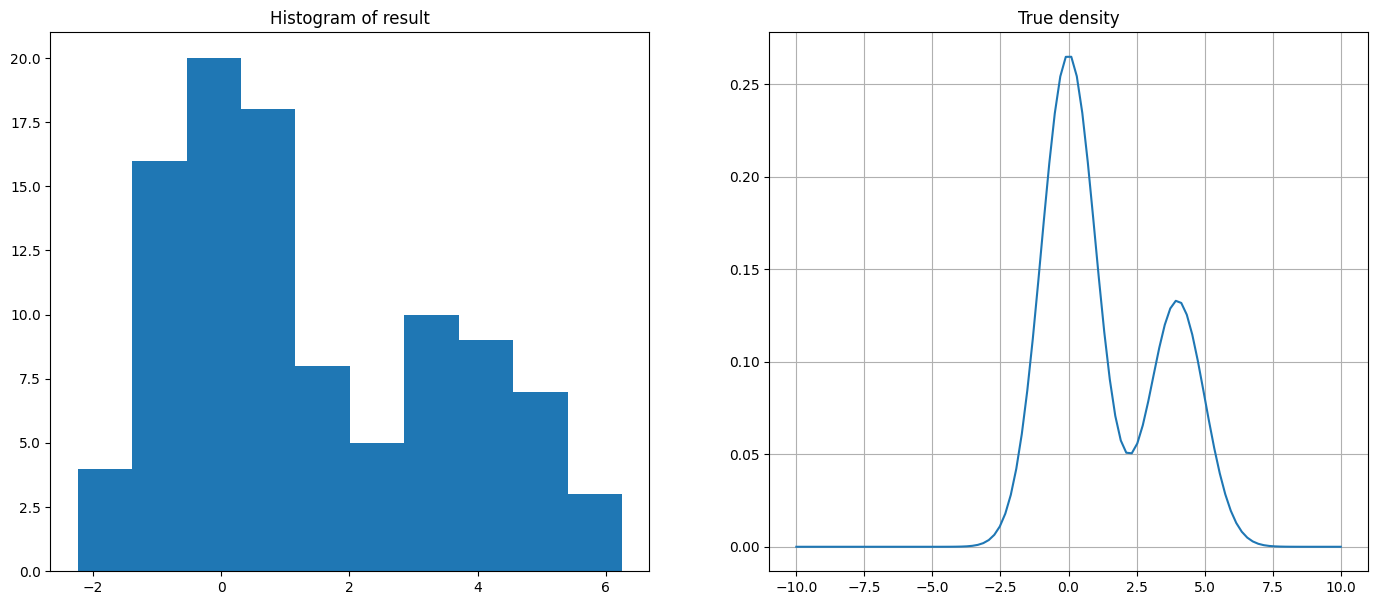

In [5]:
# Samples
X = gen_unif(100, 1, -5, 5)

# Parameters of the SVGD
h = 1e-6
lam = 1
sigma = 1
T = 500

# Performing SVGD
xf_mix = SVGD_gauss(tar_mix, X, h, lam, sigma, T) 

# Plotting the results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# Plot the histogram of data
axs[0].hist(xf_mix)
axs[0].set_title('Histogram of result')

# Plot the True density
x = np.linspace(-10,10,100)
y = mix_gauss(x ,mean1, mean2, sigma1, sigma2)
axs[1].plot(x,y)
axs[1].set_title('True density')
axs[1].grid()

# Show the plot
plt.show()

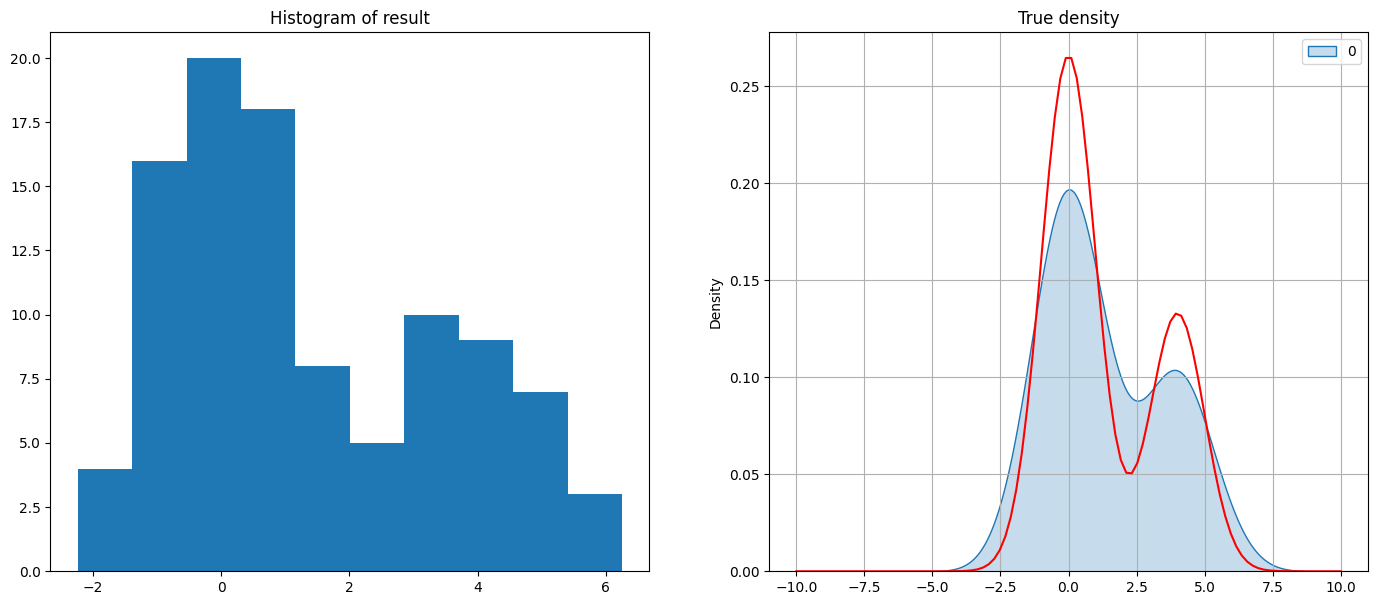

In [8]:
# Plotting the results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# Plot the histogram of data
axs[0].hist(xf_mix)
axs[0].set_title('Histogram of result')

# Plot the True density
sns.kdeplot(data = xf_mix, fill=True, ax=axs[1], bw_method='silverman')
x = np.linspace(-10,10,100)
y = mix_gauss(x ,mean1, mean2, sigma1, sigma2)
axs[1].plot(x,y, c = 'r')
axs[1].set_title('True density')
axs[1].grid()

# Show the plot
plt.show()

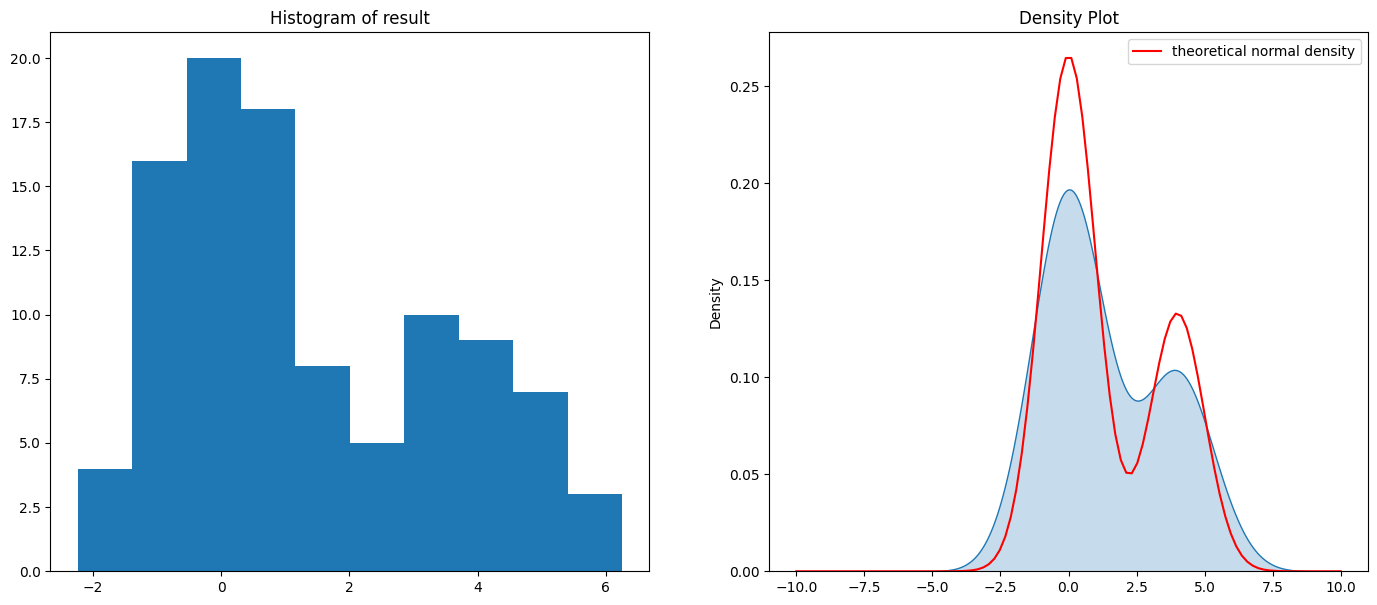

In [10]:
# Plotting the results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

# Plot the histogram of data
axs[0].hist(xf_mix)
axs[0].set_title('Histogram of result')

# Plot density and the theoretical one
sns.kdeplot(data = xf_mix, fill=True, ax=axs[1], bw_method='silverman')
t = np.linspace(-10, 10, 100)
y = mix_gauss(t, 0, 4, 1, 1)
axs[1].plot(t, y, color="red", label="theoretical normal density")
axs[1].set_title('Density Plot')
axs[1].legend()

# Show the plot
plt.show()

In [72]:
# Result of estimators:
mask1 = (xf_mix < 5)
x1 = xf_mix[mask1]
mask2 = (xf_mix > 5)
x2 = xf_mix[mask2]
print("The estimation of mean 1 is : ", empirical_mean(x1))
print("The estimation of variance 1 is : ", empirical_variance(x1))
print("The estimation of mean 1 is : ", empirical_mean(x2))
print("The estimation of variance 1 is : ", empirical_variance(x2))

The estimation of mean 1 is :  3.170257492970174e-05
The estimation of variance 1 is :  1.003284296986425
The estimation of mean 1 is :  nan
The estimation of variance 1 is :  -0.0


/var/folders/md/73tlwn611t99m1h0qypsxykc0000gn/T/ipykernel_7000/1539601834.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(x) / N


# Par ci par là: Schémas pour l'état de l'art

## Gradient descent scheme:

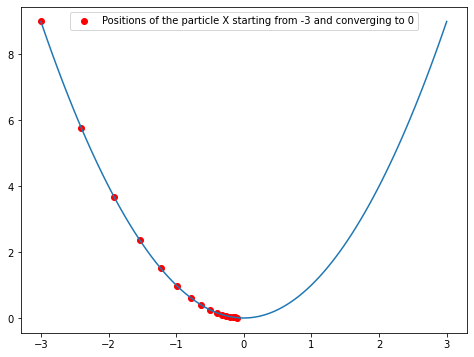

In [15]:
def f(x):
    return x**2

def gf(x):
    return 2*x
def desc(grad,gamma,x0, n):
    x = x0
    l = [x0]
    for i in range(n):
        x = x-gamma*grad(x)
        l.append(x)
    return np.array(l)

x0 = -3.
gamma = 0.1
n = 15
t = np.linspace(-3,3,100)
l = desc(gf,gamma,x0,n)
plt.figure(figsize=(8,6))
plt.plot(t, f(t))
plt.scatter(l,f(l), c='r', label='Positions of the particle X starting from -3 and converging to 0')
plt.legend()
plt.show()

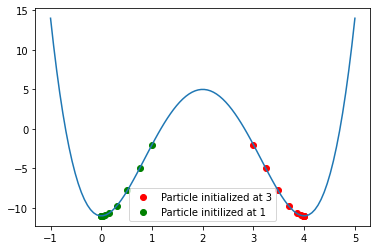

In [16]:
def F(x):
    return (x-2)**4 - 8*(x-2)**2 + 5

def grF(x):
    return 4*(x-2)**3 -16*(x-2)

t = np.linspace(-1,5,100)
gamma = 0.02
n = 10
x1 = 3
x2 = 1

l1 = desc(grF,gamma,x1,n)
l2 = desc(grF,gamma,x2,n)
plt.scatter(l1,F(l1),c='r',label='Particle initialized at 3')
plt.scatter(l2,F(l2),c='g',label='Particle initilized at 1')
plt.legend()
plt.plot(t,F(t))
plt.show()

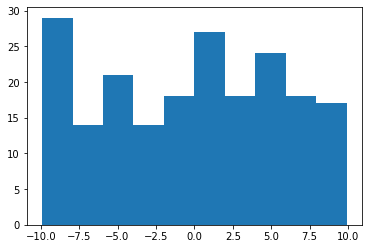

In [19]:
# Generating uniform variables
X = genData(200,1)
h = 1e-10
lam=1
sigma=1
maxit=150
plt.hist(X)

plt.show()

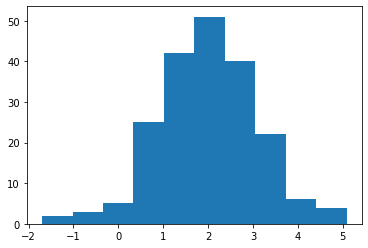

In [30]:
# Applying SVGD with noise to these variables

# standard deviation of the noise
b = 2

# Simulation
xf = SVGD_bruit(tar, X, h, lam, sigma, b, maxit) # expected time : 2m30s max
plt.hist(xf)
plt.show()

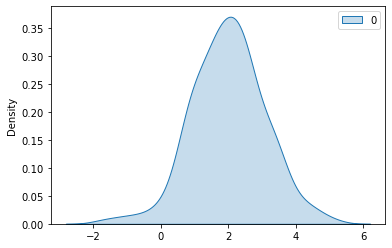

In [31]:
# Visualizing the density with seaborn
sns.kdeplot(data=xf, fill=True)
t = np.linspace(-1,5,100)


### Test with Gaussian mixture:

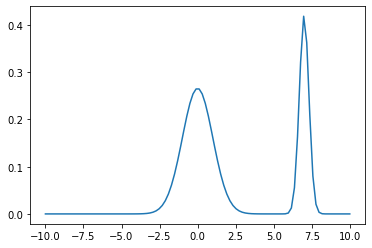

In [32]:
# Visualizing the target distribution
mean1 = 0
mean2 = 7
sigma1 = 1
sigma2 = np.sqrt(0.1)
x = np.linspace(-10,10,100)
y = mix_gauss(x,mean1,mean2,sigma1,sigma2)
plt.plot(x,y)
plt.show()


<AxesSubplot:ylabel='Density'>

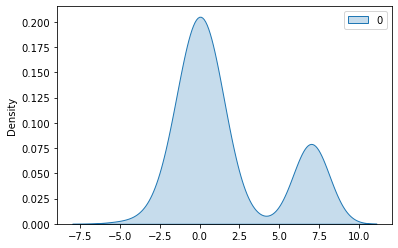

In [33]:
# Gauss mixture
xf = SVGD_bruit(tar2, X, h, lam, sigma, b, 200) # time : 27m12s for 500 iterations
sns.kdeplot(data=xf, fill=True)


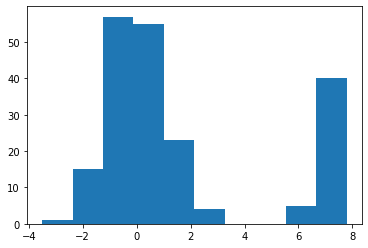

In [28]:
# Histograms
plt.hist(xf)
plt.show()